Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from /Users/sandy/Documents/University/4A Exchange/CS3244/NUS-CS3244-Assignment1/scripts/lib/../data/Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (94896

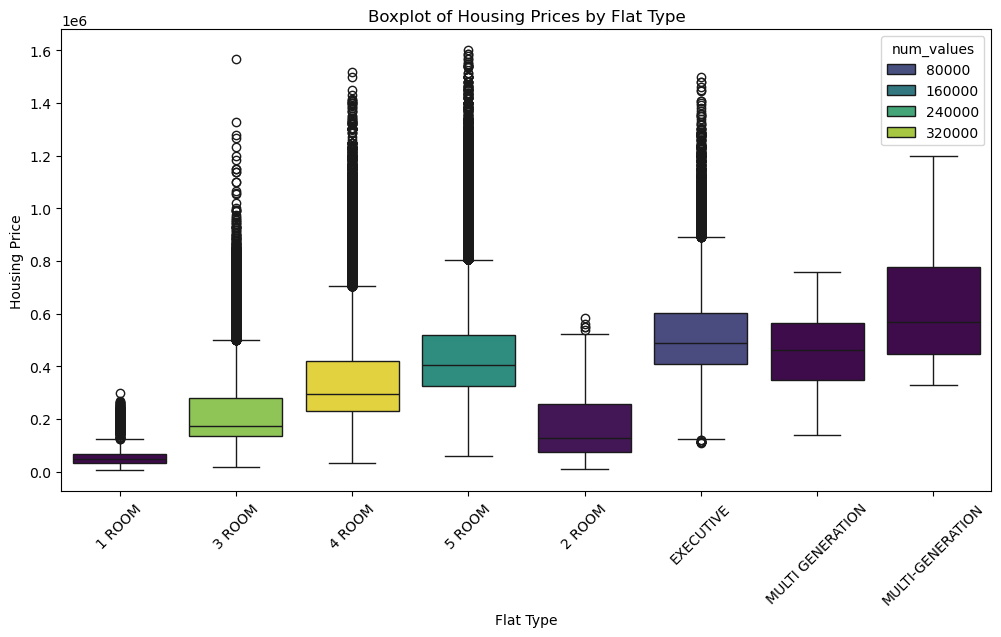

In [2]:
# Let's analyze the 'block' feature and its relationship with housing prices
from lib.utils import load_all_resale_data, get_cleaned_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with just the block feature
X, y = load_all_resale_data(include_features=['flat_type'])

# if "flat_type" in X.columns:
#     flat_type_mapping = {
#         "MULTI-GENERATION": "MULTI-GENERATION",
#         "MULTI GENERATION": "MULTI-GENERATION",
#     }
#     X["flat_type"] = X["flat_type"].replace(flat_type_mapping)


# color being the number of values
X['num_values'] = X.groupby('flat_type')['flat_type'].transform('count')

# sort according to mean price
X['mean_price'] = y.groupby(X['flat_type']).transform('mean')
X.sort_values('mean_price', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x=X['flat_type'], y=y, hue=X['num_values'], palette='viridis')
plt.title('Boxplot of Housing Prices by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Housing Price')
plt.xticks(rotation=45)
plt.show()

There exists a clear ordinal relationship among the different flat types. Therefore, we map the 1 - 5 Room types to their number of rooms, "MULTI GENERATION" to 5, and"EXECUTIVE" and "MULTI-GENERATION" to 6, 
allowing us to take advantage of the ordinal feature of this categorical field. Note that there exists a non-trivial difference in the prices for the multi generation and multi-generation types, so we encode them as separate categories to fully utilize their price disparities. 